In [1]:
#Versions de les llibreries importades al fitxer requirements del repositori
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib as mpl

In [2]:
# Les dades usades en el notebook s'ha descarregat com a csv a partir de la següent pàgina web:
# https://analisi.transparenciacatalunya.cat/Educaci-/Avaluaci-de-sis-d-educaci-prim-ria/rk5x-gny6

# Directori on tenim guardades les dades
data_dir = "../Dades-Notes/"

# Directori on es guardaran les figures obtingudes
save_dir = "../Final figures/"

In [3]:
#Importem el dataset guardat com a csv
df_sise = pd.read_csv(data_dir+"SisePrim.csv", low_memory=False) 
df_sise = df_sise.replace(',', '.', regex=True) #Canviem el separador decimal de ',' a '.' per poder-hi treballar

In [63]:
#Canviem el nom de les columnes per millorar la visualització de les dades
df_sise = df_sise.rename(columns={'PCAT': 'Catalan'})
df_sise = df_sise.rename(columns={'PCAST': 'Spanish'})
df_sise = df_sise.rename(columns={'PANG': 'English'})
df_sise = df_sise.rename(columns={'PMAT': 'Mathematics'})
df_sise['AREA_TERRITORIAL'] = df_sise['AREA_TERRITORIAL'].replace('Consorci d\'Educació de Barcelona', 'C.E. Barcelona')
df_sise['AREA_TERRITORIAL'] = df_sise['AREA_TERRITORIAL'].replace('Maresme - Vallès Oriental', 'Maresme - V. Oriental')

In [64]:
#Canviem els tipus de variables de manera que hi puguem treballar passant les dades numèriques a floats
df_sise['ANY'] = df_sise['ANY'].astype(str)
df_sise['Catalan'] = df_sise['Catalan'].astype(float)
df_sise['Spanish'] = df_sise['Spanish'].astype(float)
df_sise['English'] = df_sise['English'].astype(float)
df_sise['Mathematics'] = df_sise['Mathematics'].astype(float)
df_sise['PMED'] = df_sise['PMED'].astype(float)

In [65]:
#Busquem els màxims i mínims absolutes de les mitjanes en les assignatures per tal d'uniformitzar els colormaps que utilitzarem en els gràfics
df_tmp2 = df_sise.groupby(['AREA_TERRITORIAL', 'ANY'])[['Catalan', 'Spanish', 'English', 'Mathematics']].mean(numeric_only=True).reset_index()
Assignatures = ["Catalan","Spanish","English","Mathematics"]
min_value = []
max_value = []
for i in range(len(Assignatures)):
    min_value.append(df_tmp2[Assignatures[i]].min())
    max_value.append(df_tmp2[Assignatures[i]].max())
abs_min = min(min_value) #Valor mínim absolut que usarem en la llegenda del colormap
abs_max = max(max_value) #Valor màxim absolut que usarem en la llegenda del colormap

In [66]:
#Fem un dataset que contingui només les notes d'una de les assignatures per crear cadascun dels gràfics per separat
df_cat = df_sise.groupby(['AREA_TERRITORIAL', 'ANY'])[['Catalan']].mean(numeric_only=True).reset_index()
df_cast = df_sise.groupby(['AREA_TERRITORIAL', 'ANY'])[['Spanish']].mean(numeric_only=True).reset_index()
df_ang = df_sise.groupby(['AREA_TERRITORIAL', 'ANY'])[['English']].mean(numeric_only=True).reset_index()
df_mat = df_sise.groupby(['AREA_TERRITORIAL', 'ANY'])[['Mathematics']].mean(numeric_only=True).reset_index()

In [67]:
#Reformatitzem les dades per a que estiguin totes en una única columna utilitzant el .melt de pandas
df_meltedcat = df_cat.melt(id_vars=['AREA_TERRITORIAL', 'ANY'], var_name='Subject', value_name='Grade')
df_meltedcast = df_cast.melt(id_vars=['AREA_TERRITORIAL', 'ANY'], var_name='Subject', value_name='Grade')
df_meltedang = df_ang.melt(id_vars=['AREA_TERRITORIAL', 'ANY'], var_name='Subject', value_name='Grade')
df_meltedmat = df_mat.melt(id_vars=['AREA_TERRITORIAL', 'ANY'], var_name='Subject', value_name='Grade')

In [68]:
#Canviem el format dels anys de 20xx a xx per millorar la visualització del gràfic en el català
df_meltedcat['ANY'] = df_meltedcat['ANY'].replace('2009', '09', regex=True)
anys = list(np.arange(10,23))
for i in anys:    
    year = str('20'+str(i))
    df_meltedcat['ANY'] = df_meltedcat['ANY'].replace(year, str(i), regex=True)
    
#Canviem el format dels anys de 20xx a xx per millorar la visualització del gràfic en el castellà
df_meltedcast['ANY'] = df_meltedcast['ANY'].replace('2009', '09', regex=True)
anys = list(np.arange(10,23))
for i in anys:    
    year = str('20'+str(i))
    df_meltedcast['ANY'] = df_meltedcast['ANY'].replace(year, str(i), regex=True)

#Canviem el format dels anys de 20xx a xx per millorar la visualització del gràfic en l'anglès
anys = list(np.arange(10,23))
for i in anys:    
    year = str('20'+str(i))
    df_meltedang['ANY'] = df_meltedang['ANY'].replace(year, str(i), regex=True)

#Canviem el format dels anys de 20xx a xx per millorar la visualització del gràfic en les Mathematics
df_meltedmat['ANY'] = df_meltedmat['ANY'].replace('2009', '09', regex=True)
anys = list(np.arange(10,23))
for i in anys:    
    year = str('20'+str(i))
    df_meltedmat['ANY'] = df_meltedmat['ANY'].replace(year, str(i), regex=True)

<>:7: SyntaxWarning: invalid escape sequence '\F'
<>:7: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Arnau Codina\AppData\Local\Temp\ipykernel_11548\3988667329.py:7: SyntaxWarning: invalid escape sequence '\F'
  plt.savefig(save_dir+'\Fig 1 Arnau Catala')


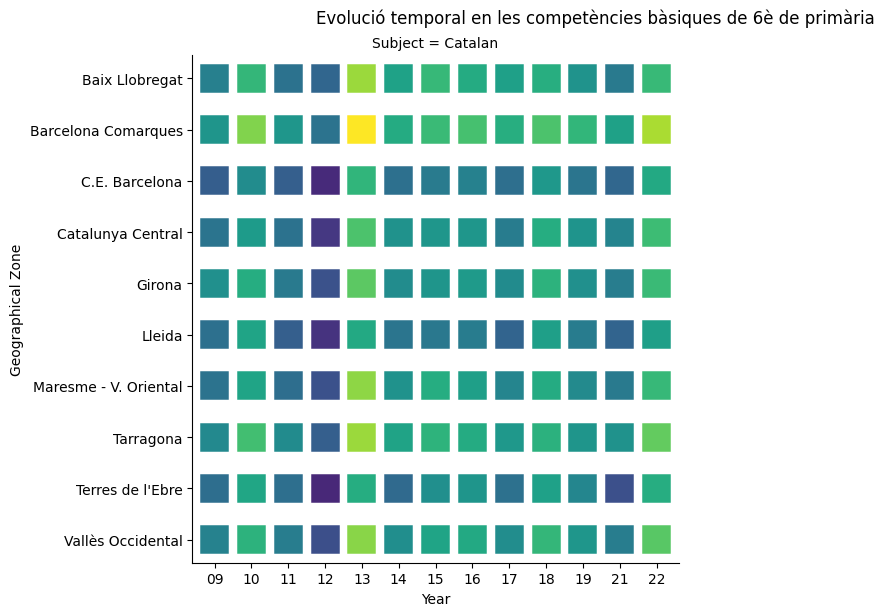

In [69]:
#Creem el gràfic utilitzant els mòduls map_dataframe i scatterplot del seaborn
custom_palette = sns.color_palette(palette='viridis_r', as_cmap=True)
g = sns.FacetGrid(df_meltedcat, col="Subject", col_wrap=2, height=6, sharex=False)
g.map_dataframe(sns.scatterplot, x="ANY", y="AREA_TERRITORIAL", hue="Grade", palette=custom_palette, marker="s", s=500, hue_norm = LogNorm(vmin=abs_min, vmax=abs_max))
g.set_axis_labels("Year", "Geographical Zone")
g.fig.suptitle("Evolució temporal en les competències bàsiques de 6è de primària", y=1.02)
# plt.savefig(save_dir+'\Fig 1 Arnau Catala')
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\F'
<>:7: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Arnau Codina\AppData\Local\Temp\ipykernel_11548\268958941.py:7: SyntaxWarning: invalid escape sequence '\F'
  plt.savefig(save_dir+'\Fig 2 Arnau Castella')


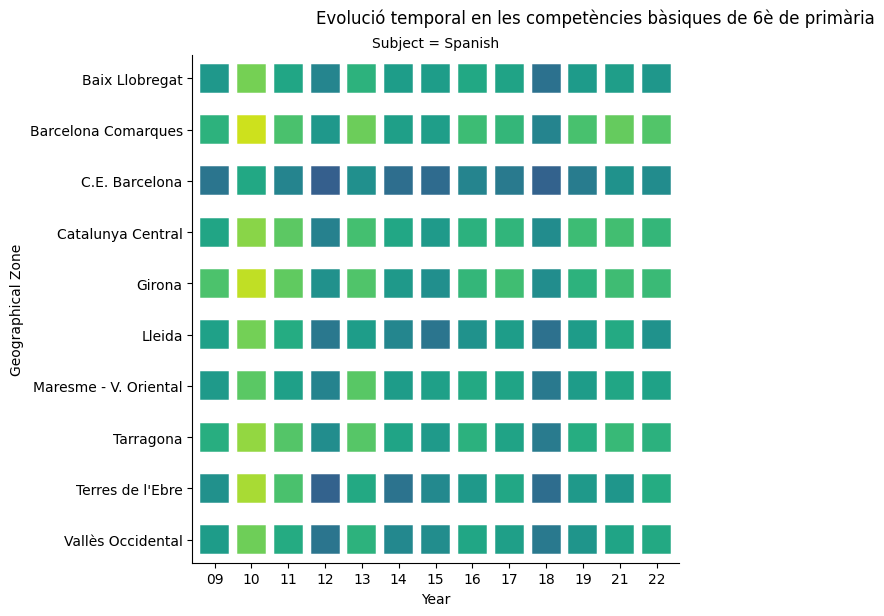

In [70]:
#Creem el gràfic utilitzant els mòduls map_dataframe i scatterplot del seaborn
custom_palette = sns.color_palette(palette='viridis_r', as_cmap=True)
g = sns.FacetGrid(df_meltedcast, col="Subject", col_wrap=2, height=6, sharex=False)
g.map_dataframe(sns.scatterplot, x="ANY", y="AREA_TERRITORIAL", hue="Grade", palette=custom_palette, marker="s", s=500, hue_norm = LogNorm(vmin=abs_min, vmax=abs_max))
g.set_axis_labels("Year", "Geographical Zone")
g.fig.suptitle("Evolució temporal en les competències bàsiques de 6è de primària", y=1.02)
# plt.savefig(save_dir+'\Fig 2 Arnau Castella')
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\F'
<>:7: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Arnau Codina\AppData\Local\Temp\ipykernel_11548\3057452577.py:7: SyntaxWarning: invalid escape sequence '\F'
  plt.savefig(save_dir+'\Fig 3 Arnau Angles')


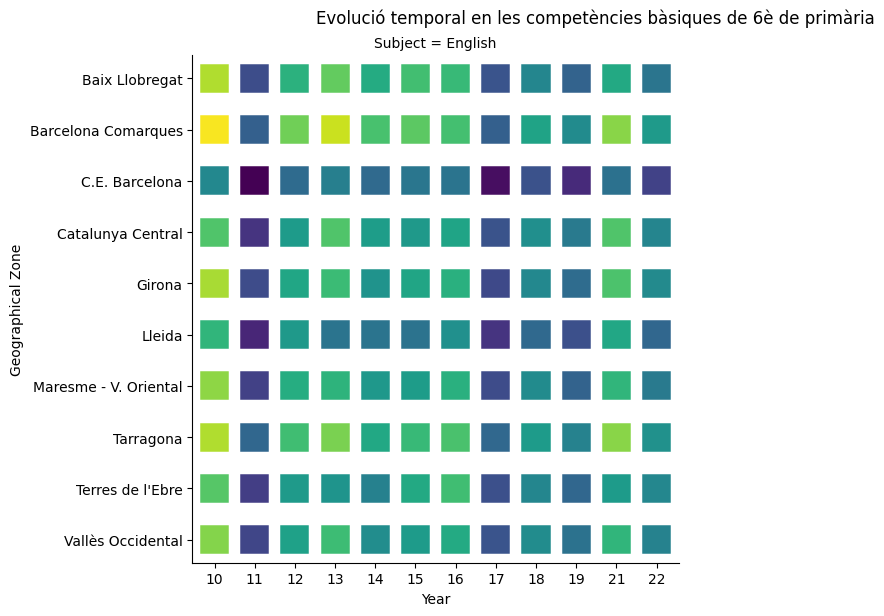

In [71]:
#Creem el gràfic utilitzant els mòduls map_dataframe i scatterplot del seaborn
custom_palette = sns.color_palette(palette='viridis_r', as_cmap=True)
g = sns.FacetGrid(df_meltedang, col="Subject", col_wrap=2, height=6, sharex=False)
g.map_dataframe(sns.scatterplot, x="ANY", y="AREA_TERRITORIAL", hue="Grade", palette=custom_palette, marker="s", s=500, hue_norm = LogNorm(vmin=abs_min, vmax=abs_max))
g.set_axis_labels("Year", "Geographical Zone")
g.fig.suptitle("Evolució temporal en les competències bàsiques de 6è de primària", y=1.02)
# plt.savefig(save_dir+'\Fig 3 Arnau Angles')
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\F'
<>:7: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Arnau Codina\AppData\Local\Temp\ipykernel_11548\1799662096.py:7: SyntaxWarning: invalid escape sequence '\F'
  plt.savefig(save_dir+'\Fig 4 Arnau Mates')


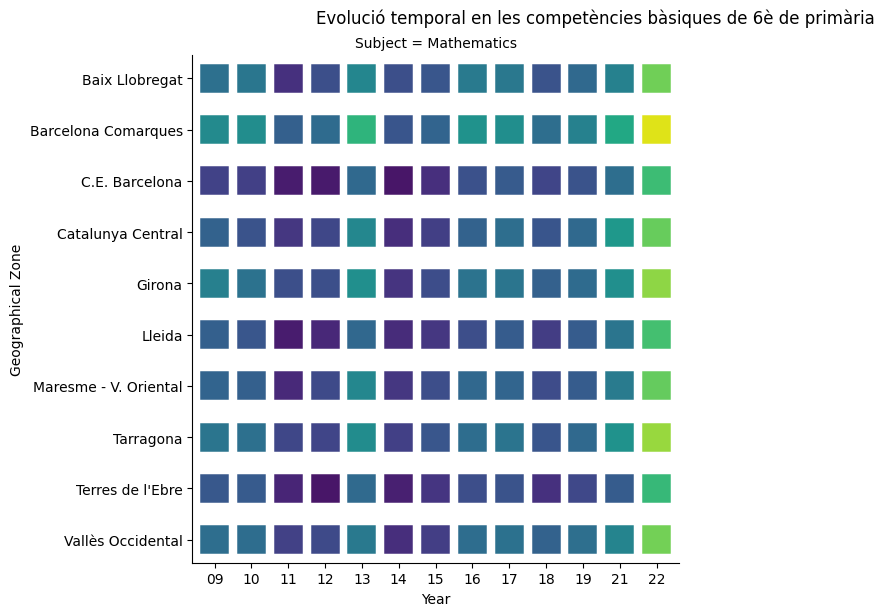

In [72]:
#Creem el gràfic utilitzant els mòduls map_dataframe i scatterplot del seaborn
custom_palette = sns.color_palette(palette='viridis_r', as_cmap=True)
g = sns.FacetGrid(df_meltedmat, col="Subject", col_wrap=2, height=6, sharex=False)
g.map_dataframe(sns.scatterplot, x="ANY", y="AREA_TERRITORIAL", hue="Grade", palette=custom_palette, marker="s", s=500, hue_norm = LogNorm(vmin=abs_min, vmax=abs_max))
g.set_axis_labels("Year", "Geographical Zone")
g.fig.suptitle("Evolució temporal en les competències bàsiques de 6è de primària", y=1.02)
# plt.savefig(save_dir+'\Fig 4 Arnau Mates')
plt.show()

C:\Users\Arnau Codina\AppData\Local\Temp\ipykernel_11548\2572111689.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


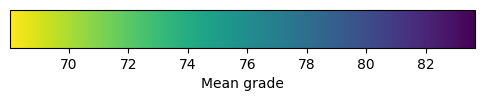

In [14]:
#Creem la colorbar que farà de llegenda per als gràfics mitjançant matplotlib 
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
norm = mpl.colors.Normalize(vmin=abs_min, vmax=abs_max)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap='viridis_r', norm=norm, orientation='horizontal')
cb1.set_label('Mean grade')
# plt.savefig(save_dir+'\Colorbar Arnau')
fig.show()